## unsuphw
31.8.25

imports:

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Tasks 1-7

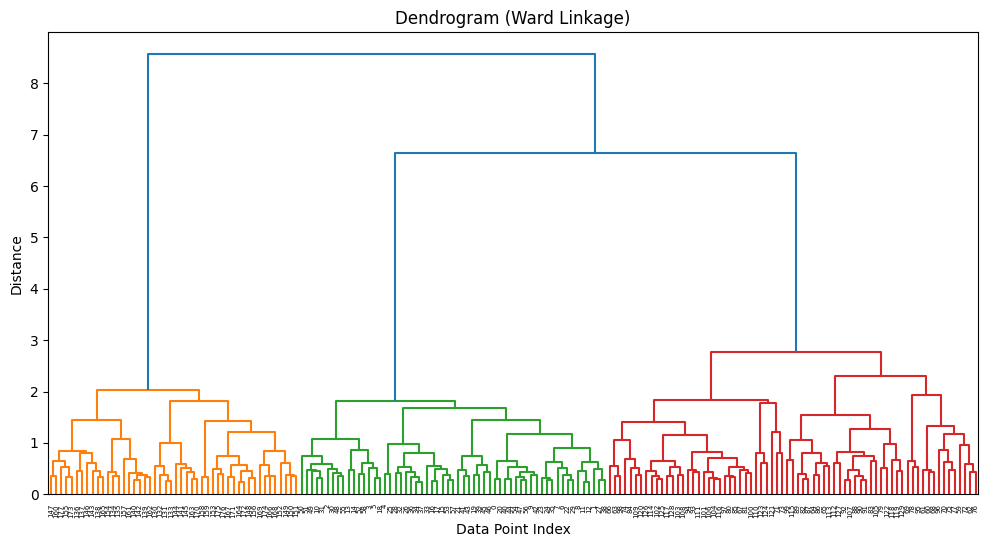

cluster
1    48
2    59
3    71
Name: count, dtype: int64


In [34]:
# 1. טוענים את הדאטה
df = pd.read_csv("wine_dataset.csv")

# 2. מנקים רק עמודות מספריות
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# 3. סקיילינג (נרמול) עם MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# 4. בונים לינקג' עם שיטת ward
linkage_matrix = linkage(df_scaled, method='ward')

# 5. מציירים דנדרוגרמה
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Data Point Index")
plt.ylabel("Distance")
plt.show()

# 6. Cut the tree into 3 clusters and get labels (1..3)
cluster_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

# 7. Attach labels back to the (scaled or original) dataframe
df['cluster'] = cluster_labels  # or df_scaled['cluster'] = cluster_labels

# Quick peek at counts
print(df['cluster'].value_counts().sort_index())

Bonus 8

In [36]:
# 1. Data preprocessing
# Handle categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
  
# Scale numerical features
scaler = MinMaxScaler()
features = df_encoded.columns
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=features)
  
# 2. Apply K-means with k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_scaled)
  
# 3.1 Size of each cluster
cluster_sizes = df['cluster'].value_counts().sort_index()
print("\nCluster sizes:")
print(cluster_sizes)

# In Kmeans the groups are changing until they are optimal and in HC we start from bottom up without going back


Cluster sizes:
cluster
0    71
1    48
2    59
Name: count, dtype: int64
